In [1]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

/home/parrot/anaconda3/envs/environment/lib/python3.9/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


/home/parrot/anaconda3/envs/environment/lib/python3.9/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


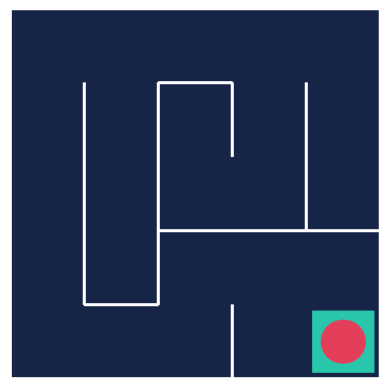

In [2]:
env = Maze()

gambar = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(gambar);

In [3]:
state_dims = env.observation_space.shape[0]
num_actions = env.action_space.n

### Buat Q table [state, actions]

In [4]:
action_values = np.zeros((5,5, 4))
action_values

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [5]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.randint(num_actions)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

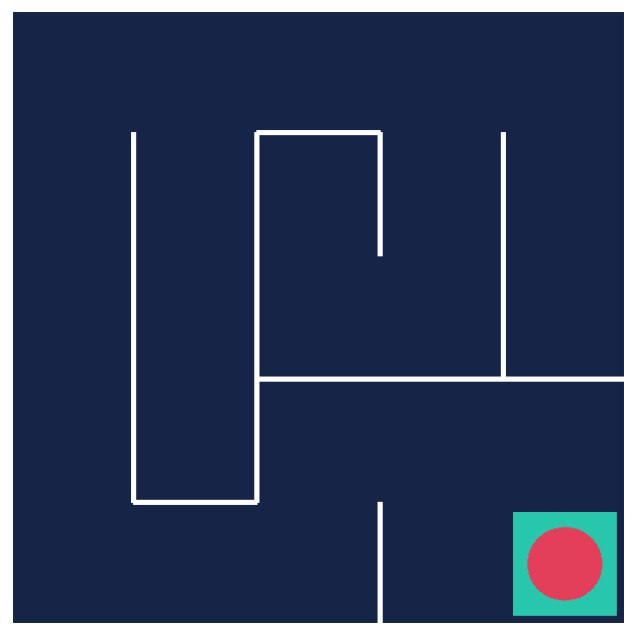

In [6]:
test_agent(env, policy, episodes=1)

In [7]:
def sarsa(policy, action_values, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            # Rumus
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            
            state = next_state
            action = next_action

### Training, jika kurang tambahkan episodes

In [8]:
sarsa(policy, action_values, episodes=20000)

### Ploting Minim Reward

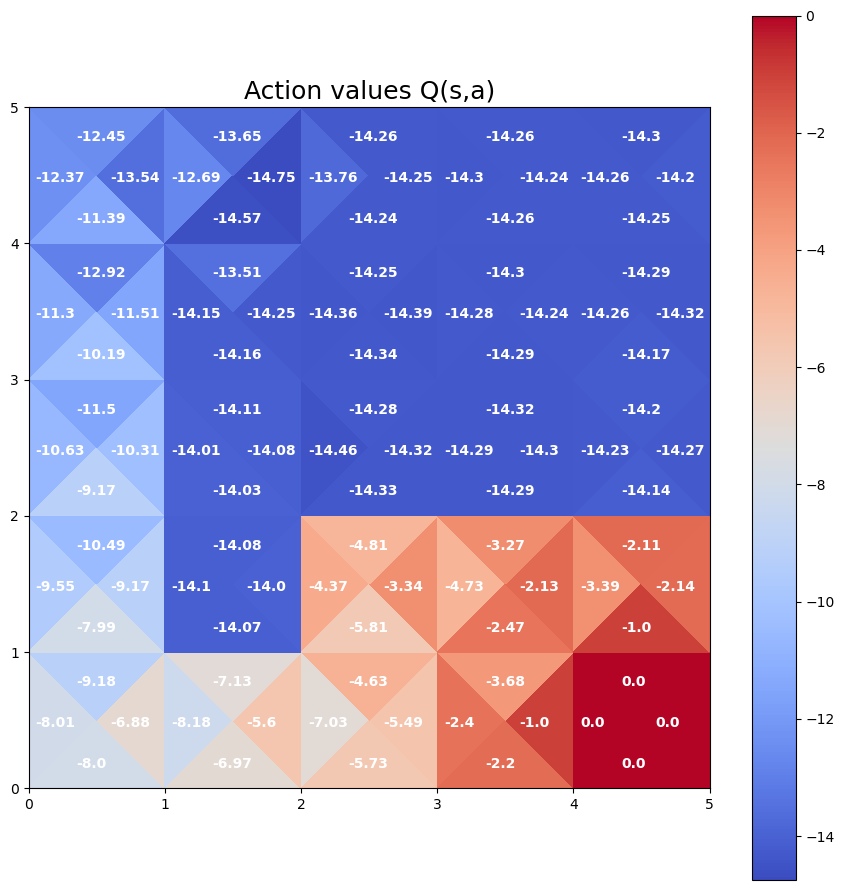

In [9]:
plot_action_values(action_values)

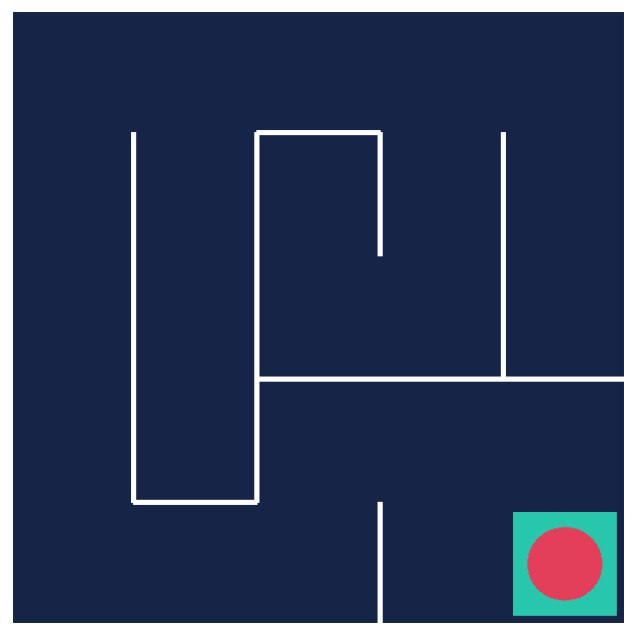

In [10]:
test_agent(env, policy, episodes=10)